**#0 Importy**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew

**#1 Generowanie danych**

In [73]:
mu, sigma = 3, 1 
data_100 = np.random.normal(mu, sigma, 100)
data_10000 = np.random.normal(mu, sigma, 10000)

**#2 Statystyki**

In [74]:
def statistics(data):
    mode_result = stats.mode(data, keepdims=True)
    return {
        "Średnia": np.mean(data),
        "Mediana": np.median(data),
        "Moda": mode_result.mode[0],
        "Min": np.quantile(data, 0.0),
        "Q1": np.quantile(data, 0.25),
        "Q3": np.quantile(data, 0.75),
        "Max": np.quantile(data, 1.0),
        "Zakres": max(data) - min(data),
        "IQR": (np.quantile(data, 0.75)) - (np.quantile(data, 0.25)),
        "Wariancja": np.var(data, ddof=1),   
        "Odchylenie standardowe": np.std(data, ddof=1),
        "Asymetria rozkładu": skew(data),            
    }

In [75]:
stats_100 = statistics(data_100)
stats_10000 = statistics(data_10000)

**#3 Wyniki statystyk**

In [76]:
print("Statystyki dla danych z 100 próbek:")
for key, value in stats_100.items():
        print(f"{key}: {value:.4f}")
 
print("\nStatystyki dla danych z 10 000 próbek:")
for key, value in stats_10000.items():
        print(f"{key}: {value:.4f}")

Statystyki dla danych z 100 próbek:
Średnia: 3.0316
Mediana: 3.0629
Moda: 1.1743
Min: 1.1743
Q1: 2.4913
Q3: 3.6682
Max: 5.2258
Zakres: 4.0514
IQR: 1.1769
Wariancja: 0.8203
Odchylenie standardowe: 0.9057
Asymetria rozkładu: 0.0497

Statystyki dla danych z 10 000 próbek:
Średnia: 3.0051
Mediana: 3.0173
Moda: -1.1577
Min: -1.1577
Q1: 2.3260
Q3: 3.6937
Max: 6.7454
Zakres: 7.9031
IQR: 1.3676
Wariancja: 1.0234
Odchylenie standardowe: 1.0116
Asymetria rozkładu: -0.0353


**#4 Funkcja Gaussa**

In [77]:
def gauss(x, sigma=1, mu=3):
    return stats.norm.pdf(x, mu, sigma)

**#5 Wykresy**

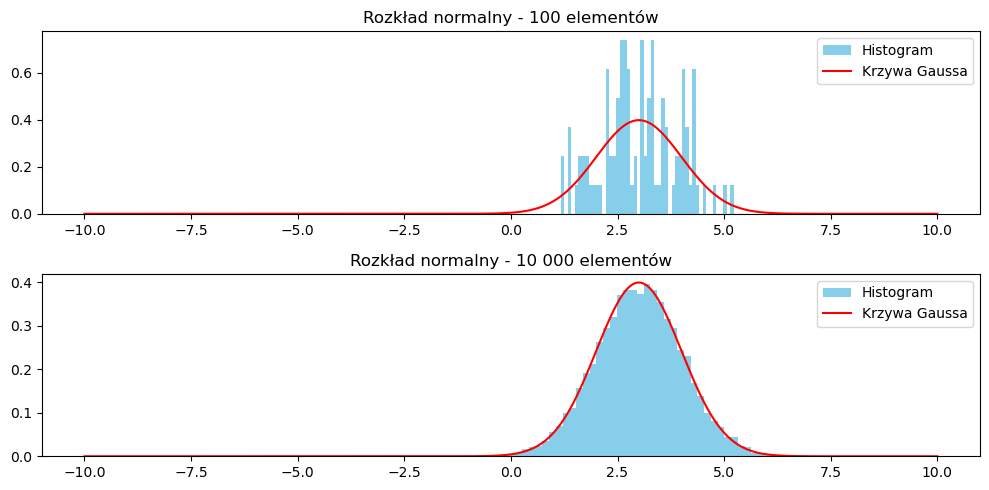

In [78]:
x = np.linspace(-10, 10, 10000)
plt.figure(figsize=(10, 5))

#Wykres dla 100 elementów
plt.subplot(2, 1, 1)
plt.hist(data_100, bins=50, density=True, color='skyblue', label="Histogram")
plt.plot(x, gauss(x, sigma=sigma, mu=mu), color='red', label="Krzywa Gaussa")
plt.title("Rozkład normalny - 100 elementów")
plt.legend()

# Histogram dla 10 000 elementów
plt.subplot(2, 1, 2)
plt.hist(data_10000, bins=50, density=True, color='skyblue', label="Histogram")
plt.plot(x, gauss(x, sigma=sigma, mu=mu), color='red', label="Krzywa Gaussa")
plt.title("Rozkład normalny - 10 000 elementów")
plt.legend()

plt.tight_layout()
plt.show()

**# Wnioski:
W mniejszej próbie (100) wartości odbiegają od oczekwanych wartości, natomiast w większej próbie (10000) wartości są bliższe teoretycznym wartościom. 
Na wykresach mniejsza próba znacznie gorzej pokrywa się z krzywą Gaussa niż próba większa.**